In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bank_churn.csv")

In [3]:
display(df.head(2), df.sample(2), df.tail(2))

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.0,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.0,0.0,0.090909,99.0
1,2024,627.0,33.0,1.0,0.0,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.0,0.0,0.030303,33.0


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
31526,1339,646.0,51.0,2.0,101629.3,1.0,0,0,130541.10,0,...,0,0,1,1,0,0.0,502.926111,0.778523,0.039216,102.0
54534,2803,732.0,36.0,1.0,0.0,2.0,1,1,126768.67,0,...,0,0,1,1,0,2.0,0.000000,0.000000,0.027778,36.0


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0
175027,1570,709.0,36.0,7.0,0.00,1.0,0,1,42085.58,1,...,1,0,0,1,0,1.0,0.000000,0.000000,0.194444,252.0


In [4]:
df = df.drop(["Surname", "Surname_tfidf_0","Surname_tfidf_1","Surname_tfidf_2","Surname_tfidf_3","Surname_tfidf_4","HasCrCard"], axis=1)
df = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173815 entries, 0 to 175027
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         173815 non-null  float64
 1   Age                 173815 non-null  float64
 2   Tenure              173815 non-null  float64
 3   Balance             173815 non-null  float64
 4   NumOfProducts       173815 non-null  float64
 5   IsActiveMember      173815 non-null  int64  
 6   EstimatedSalary     173815 non-null  float64
 7   Exited              173815 non-null  int64  
 8   France              173815 non-null  int64  
 9   Germany             173815 non-null  int64  
 10  Spain               173815 non-null  int64  
 11  Female              173815 non-null  int64  
 12  Male                173815 non-null  int64  
 13  Mem__no__Products   173815 non-null  float64
 14  Cred_Bal_Sal        173815 non-null  float64
 15  Bal_sal             173815 non-null  fl

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,173815.0,656.145419,81.055120,350.00,597.000000,659.000000,710.000000,8.500000e+02
Age,173815.0,38.172263,8.960981,18.00,32.000000,37.000000,42.000000,9.200000e+01
Tenure,173815.0,5.020516,2.810899,0.00,3.000000,5.000000,7.000000,1.000000e+01
Balance,173815.0,56658.437870,62975.136199,0.00,0.000000,0.000000,120727.970000,2.508981e+05
NumOfProducts,173815.0,1.552973,0.549358,1.00,1.000000,2.000000,2.000000,4.000000e+00
IsActiveMember,173815.0,0.498599,0.499999,0.00,0.000000,0.000000,1.000000,1.000000e+00
EstimatedSalary,173815.0,111900.682904,50777.395187,11.58,73329.080000,116971.050000,154767.485000,1.999925e+05
Exited,173815.0,0.211990,0.408719,0.00,0.000000,0.000000,0.000000,1.000000e+00
France,173815.0,0.566740,0.495527,0.00,0.000000,1.000000,1.000000,1.000000e+00
Germany,173815.0,0.212300,0.408938,0.00,0.000000,0.000000,0.000000,1.000000e+00


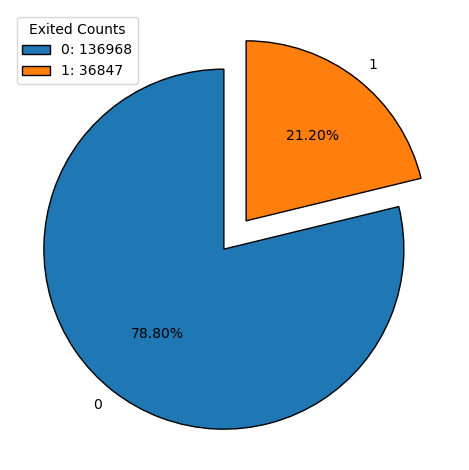

In [7]:
exited_counts = df["Exited"].value_counts()
plt.pie(exited_counts, labels=exited_counts.index, autopct='%1.2f%%',  explode=(0.1, 0.1), startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

legend_labels = [f'{index}: {count}' for index, count in zip(exited_counts.index, exited_counts)]
plt.legend(legend_labels, title='Exited Counts', loc='upper left')
plt.tight_layout()
plt.show()

## Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [10]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"""
X_train = {X_train.shape}
X_test = {X_test.shape}""")


X_train = (139052, 17)
X_test = (34763, 17)


In [11]:
# Instatiate StandardScaler and fit it to the training data
scaler = StandardScaler()  # standardize features by removing the mean and scaling to unit variance
scaler.fit(X_train)
# scale separately the train and test dataset in order to avoid data leakage

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(type(X_train_scaled))
print(type(X_test_scaled))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

In [14]:
X_train_bank = pd.DataFrame(X_train_const)
X_test_bank = pd.DataFrame(X_test_const)

print(type(X_train_bank))
print(type(X_test_bank))
print(type(y_train))
print(type(y_train))

X_train_bank.sample(5)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
41425,1.0,-0.384228,-1.134775,-1.432031,-0.899583,0.814931,-0.997041,-0.338446,0.874015,-0.518708,-0.532727,1.135971,-1.135971,-0.900103,-0.023508,-0.023500,-1.205983,-1.376571
9363,1.0,-0.631190,0.093684,-1.432031,-0.899583,0.814931,-0.997041,1.478018,0.874015,-0.518708,-0.532727,-0.880304,0.880304,-0.900103,-0.023508,-0.023500,-1.323898,-1.284034
88669,1.0,0.245523,0.317040,1.057414,0.786603,-1.004967,-0.997041,-0.831792,0.874015,-0.518708,-0.532727,-0.880304,0.880304,-0.900103,-0.007711,-0.008218,0.660005,1.147173
111944,1.0,-2.162351,-1.023097,-0.365126,-0.899583,0.814931,-0.997041,-2.168349,0.874015,-0.518708,-0.532727,1.135971,-1.135971,-0.900103,-0.023508,-0.023500,-0.009458,-0.636273
8980,1.0,1.183977,-0.241350,0.701779,-0.899583,0.814931,1.002967,-0.549488,-1.144145,-0.518708,1.877135,-0.880304,0.880304,1.394915,-0.023508,-0.023500,0.652074,0.507824


In [15]:
X_train_bank.to_csv("bank_X_train.csv", index=False)
X_test_bank.to_csv("bank_X_test.csv", index=False)
y_train.to_csv("bank_y_train.csv", index=False)
y_test.to_csv("bank_y_test.csv", index=False)

### Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)
pred1 = model1.predict(X_test_scaled)

### Metrics

In [17]:
from sklearn.metrics import accuracy_score
model1_acc = accuracy_score(y_test, pred1)
print("Accuracy: ", model1_acc)

Accuracy:  0.8347093173776716


In [19]:
w_star = np.insert(model1.coef_, 0, np.array(model1.intercept_))
print(w_star)

[-1.76984304 -0.06255001  0.82970497  1.98794027 -0.10962441 -0.45279649
 -0.56269363  0.04735532 -0.16631551  0.32546375 -0.12198455  0.1628767
 -0.1628767  -0.07233025 -0.02128602  0.02046899 -1.27746299 -0.990118  ]


In [25]:
from sklearn.metrics import log_loss
loss = log_loss(y_train, model1.predict_proba(X_train_scaled))
print(f"Solver: {model1.solver}" + f"\nIntercept: {model1.intercept_}" + f"\nCoefficients: {model1.coef_}" +
      f"\nObjective function: {loss}")

Solver: lbfgs
Intercept: [-1.76984304]
Coefficients: [[-0.06255001  0.82970497  1.98794027 -0.10962441 -0.45279649 -0.56269363
   0.04735532 -0.16631551  0.32546375 -0.12198455  0.1628767  -0.1628767
  -0.07233025 -0.02128602  0.02046899 -1.27746299 -0.990118  ]]
Objective function: 0.3979849751482836
